# COMP47590 Advanced Machine Learning
# MLPs with Pytorch DATA STARTER

Import packages that will be used in this demo. 

In [257]:
import numpy as np  # to handle matrix and data operation
import pandas as pd  # to read csv and handle dataframe

np.random.seed(1337)  # for reproducibility
pd.set_option('display.max_columns', None)  # to display all columns

import matplotlib.pyplot as plt
%matplotlib inline

import os
import random
import scipy as sp
import PIL

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Dataset Pre-Processing

Read in the cifar-10 dataset and divides the data into Train, Validation and Test sets. 

In [258]:
dataset = pd.read_csv('../Data/cifar_10.csv')
target_feature_name = 'label'
classes = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer",
           5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}
img_width = 32
img_height = 32
img_channels = 3

In [259]:
dataset

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0       59   43   50   68   98  119  139  145  149  149  131  125  142  144   
1      154  126  105  102  125  155  172  180  142  111  106  109  123  127   
2      255  253  253  253  253  253  253  253  253  253  253  253  253  253   
3       28   37   38   42   44   40   40   24   32   43   30   32   41   52   
4      170  168  177  183  181  177  181  184  189  189  188  183  182  184   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  145  151  156  155  153  153  157  161  161  161  162  165  164  163   
49996  255  254  255  254  254  254  254  253  254  254  254  254  253  254   
49997   35   40   42   39   43   45   48   51   53   56   58   59   58   61   
49998  189  186  185  184  182  181  180  180  181  180  179  180  183  185   
49999  229  236  234  231  236  242  246  246  242  236  232  232  233  232   

        14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
0      137  129  137  134  124  139  139  133  136  139  152  163  168  159   
1      181  217  209  166  164  158  116  102   95   90   72   60   56   77   
2      253  254  245  226  244  241  250  253  252  250  253  253  253  253   
3       67   50   44   43   38   38   41   47   62   87   60   49   63   59   
4      184  180  177  177  177  176  175  175  173  170  169  168  166  163   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  162  162  160  157  161  165  165  164  165  166  164  160  157  152   
49996  254  254  254  254  254  255  254  253  254  251  238  217  193  170   
49997   63   66   70   70   68  100  165  206  226  240  232  235  246  227   
49998  184  184  184  184  185  186  188  187  187  186  186  184  181  176   
49999  227  220  214  210  208  208  210  212  212  213  215  216  220  217   

        28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
0      158  158  152  148   16    0   18   51   88  120  128  127  126  116   
1       94   91   87   79  140  145  125  124  150  152  174  178  134  110   
2      253  253  253  253  255  255  255  255  255  255  255  255  255  255   
3       48   76   81   85   33   34   32   39   35   38   38   40   54   48   
4      163  162  158  157  168  172  171  166  171  174  177  179  180  177   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  149  148  146  142  153  156  155  152  152  154  157  164  167  166   
49996  143  120  114  118  254  254  255  254  253  254  255  253  254  255   
49997  170   99   79   89   57   44   50   52   54   57   62   64   65   66   
49998  174  175  172  169  194  191  190  189  188  187  187  187  186  185   
49999  214  217  221  222  222  239  233  232  234  240  244  244  240  233   

        42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
0      106  101  105  113  109  112  119  109  105  125  127  122  131  124   
1      133  163  192  218  240  245  241  238  234  226  142   96   99   95   
2      255  255  255  255  255  255  238  208  197  182  241  255  255  253   
3       28   40   56   66   79   47   42   50   64   47   55   81   84  109   
4      169  175  172  160  162  174  173  171  172  171  170  171  169  167   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  165  167  167  168  167  167  168  170  172  172  168  165  162  161   
49996  255  254  254  254  254  253  253  253  254  254  254  253  254  253   
49997   67   68   66   68   72   72   77   84   84  116  167  171  185  208   
49998  185  185  187  189  188  188  187  187  186  187  188  187  187  187   
49999  230  229  230  228  222  216  212  210  209  210  211  213  215  216   

        56   57   58   59   60   61   62   63   64   65   66   67   68   69  \
0      121  131  132  133  133  123  119  122   25   16   49   83  110  129   
1       89   80   65   84   92   96   77   71  140  139

In [260]:
X = dataset.drop([target_feature_name], axis=1).values
y = dataset[target_feature_name].values

X = X / 255

Print some images from the dataset.

(Note we do some messing around with storage format for loading and display - see here for a nice explanation [https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c](https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c).)

<Figure size 1000x1000 with 0 Axes>

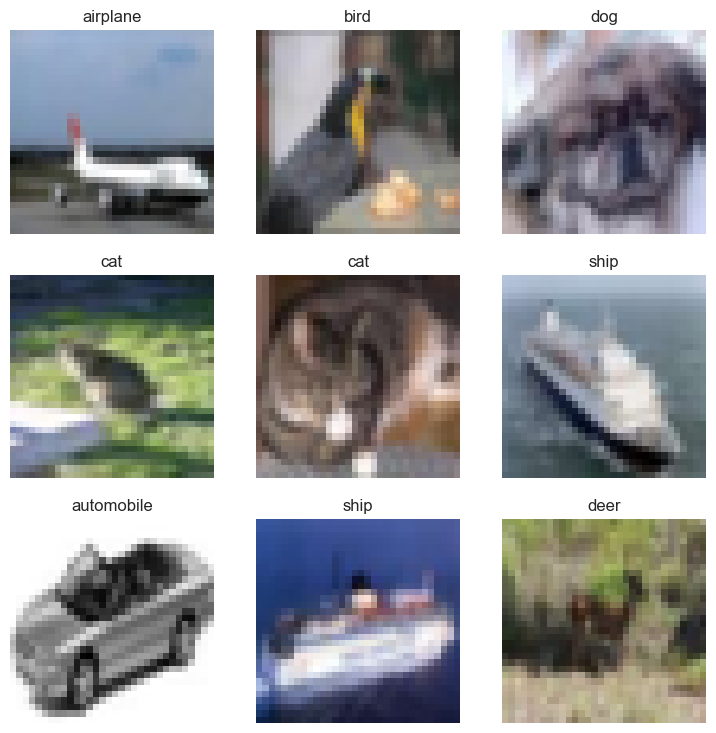

In [261]:
pltsize = 3
row_images = col_images = 3

maxtoshow = row_images * col_images

plt.figure(figsize=(col_images * pltsize, row_images * pltsize))

for i in range(0, maxtoshow):
    i_rand = random.randint(0, X.shape[0])

    # messing around with image format for display
    img = X[i_rand].reshape(img_channels, img_width, img_height)
    img = np.transpose(img, (1, 2, 0))

    plt.subplot(row_images, col_images, i + 1)
    plt.axis('off')
    plt.imshow(img, vmin=0, vmax=1)
    plt.title("{}".format(classes[y[i_rand]]))
plt.show()

In [262]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, random_state=0,
                                                                train_size=0.8,
                                                                stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, random_state=0,
                                                      train_size=0.7,
                                                      stratify=y_train_valid)
X__test = X_test
y__test = y_test

In [263]:
X_train

array([[0.5254902 , 0.54509804, 0.54117647, ..., 0.22352941, 0.22745098,
        0.21960784],
       [0.44313725, 0.54509804, 0.61176471, ..., 0.24313725, 0.28627451,
        0.30196078],
       [0.44705882, 0.45882353, 0.47058824, ..., 0.6627451 , 0.65882353,
        0.65098039],
       ...,
       [0.21960784, 0.12156863, 0.15686275, ..., 0.04705882, 0.02745098,
        0.03137255],
       [0.87843137, 0.88627451, 0.87843137, ..., 0.7254902 , 0.74509804,
        0.77254902],
       [0.75294118, 0.74509804, 0.63137255, ..., 0.61176471, 0.61960784,
        0.61960784]])

In [264]:
X_train.shape

(28000, 3072)

In [265]:
y_train.shape

(28000,)

Print some images from the training set. 

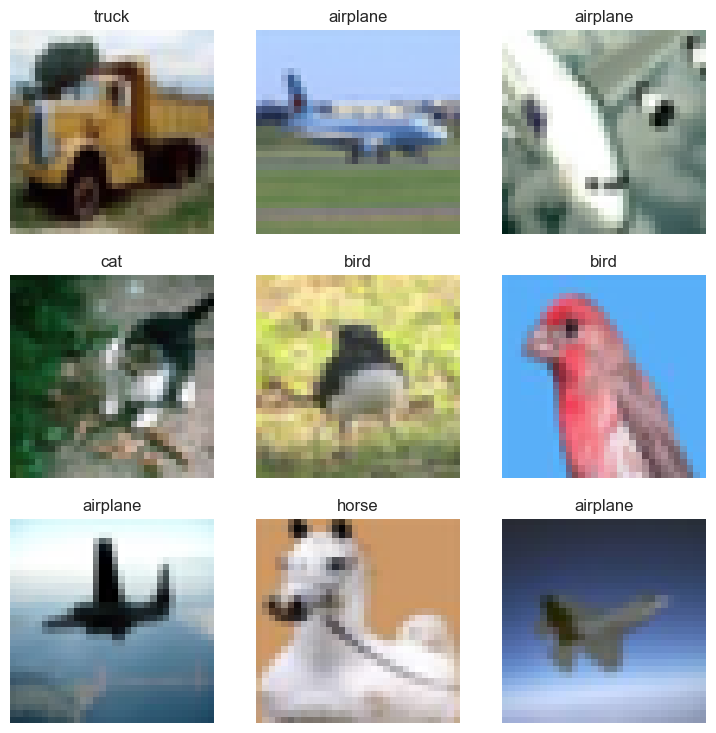

In [266]:
pltsize = 3
row_images = col_images = 3

maxtoshow = row_images * col_images

plt.figure(figsize=(col_images * pltsize, row_images * pltsize))

for i in range(0, maxtoshow):
    i_rand = random.randint(0, X_train.shape[0])

    img = X_train[i_rand].reshape(img_channels, img_width, img_height)
    img = np.transpose(img, (1, 2, 0))

    plt.subplot(row_images, col_images, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i_rand].reshape(img_width, img_height, img_channels))
    plt.imshow(img)
    plt.title("{}".format(classes[y_train[i_rand]]))
plt.show()

Convert the features to PyTorch tensors

In [267]:
X_train = torch.tensor(X_train).float()
X_valid = torch.tensor(X_valid).float()
X_test = torch.tensor(X_test).float()

Convert targets to pytorch tensors.

In [268]:
num_classes = len(classes)

y_train = torch.tensor(y_train.reshape(-1)).long()
y_valid = torch.tensor(y_valid.reshape(-1)).long()
y_test = torch.tensor(y_test.reshape(-1)).long()

# Print the shape of y_train, y_valid, y_test
print('y_train shape:', y_train.shape)
print('y_valid shape:', y_valid.shape)
print('y_test shape:', y_test.shape)

y_train shape: torch.Size([28000])
y_valid shape: torch.Size([12000])
y_test shape: torch.Size([10000])


## Model Building - MLP

In [269]:
class MLP(nn.Module):
    def __init__(self, input_size=3072, num_classes=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.relu1 = nn.ReLU()

        self.fc2 = nn.Linear(1024, 512)
        self.relu2 = nn.ReLU()

        self.fc3 = nn.Linear(512, 512)
        self.bn3 = nn.BatchNorm1d(512)
        self.relu3 = nn.Hardswish()

        self.fc4 = nn.Linear(512, 256)
        self.bn4 = nn.BatchNorm1d(256)
        self.relu4 = nn.ReLU()

        self.fc5 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.relu1(self.bn1(self.fc1(x)))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.bn3(self.fc3(x)))
        x = self.relu4(self.bn4(self.fc4(x)))
        x = self.fc5(x)
        return x

In [270]:
model = MLP()

print(model)

MLP(
  (fc1): Linear(in_features=3072, out_features=1024, bias=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (bn3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): Hardswish()
  (fc4): Linear(in_features=512, out_features=256, bias=True)
  (bn4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): ReLU()
  (fc5): Linear(in_features=256, out_features=10, bias=True)
)


In [271]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Set the number of epochs to train for
epochs = 20
batch_size = 256  # 128-256 (default, more stable but slower) -- 512-1024 (16GB+, may generalise poorly but faster)

# Define lists to store the training and validation loss and accuracy for each epoch
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Start training
for epoch in range(epochs):
    # Set the model to train mode
    model.train()

    # Initialize the training loss and accuracy for this epoch
    running_loss = 0.0
    running_corrects = 0

    # Iterate over the training set in batches
    for i in range(0, X_train.shape[0], batch_size):
        # Get a batch of features and targets from the training set
        batch_features = X_train[i:i + batch_size]
        batch_targets = y_train[i:i + batch_size]

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_features)
        loss = criterion(outputs, batch_targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Compute statistics
        running_loss += loss.item() * batch_size
        running_corrects += torch.sum(torch.argmax(outputs, dim=1) == batch_targets)

    # Compute statistics for the entire epoch
    epoch_loss = running_loss / len(X_train)
    epoch_acc = running_corrects.item() / len(X_train) * 100

    # Append the training statistics to the lists
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    # Evaluation on validation set
    with torch.no_grad():
        val_outputs = model(X_valid)
        val_loss = criterion(val_outputs, y_valid)
        val_corrects = torch.sum(torch.argmax(val_outputs, dim=1) == y_valid)
        val_acc = val_corrects.item() / len(X_valid) * 100

    # Append the validation statistics to the lists
    val_losses.append(val_loss.item())
    val_accuracies.append(val_acc)

    print(
        f'Epoch {epoch + 1}/{epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.2f}%, Validation Loss: {val_loss.item():.4f}, Validation Accuracy: {val_acc:.2f}%')

Epoch 1/20, Training Loss: 1.7000, Training Accuracy: 39.17%, Validation Loss: 1.5510, Validation Accuracy: 44.67%
Epoch 2/20, Training Loss: 1.4586, Training Accuracy: 47.56%, Validation Loss: 1.4728, Validation Accuracy: 47.25%
Epoch 3/20, Training Loss: 1.3259, Training Accuracy: 52.79%, Validation Loss: 1.4500, Validation Accuracy: 48.58%
Epoch 4/20, Training Loss: 1.2157, Training Accuracy: 56.68%, Validation Loss: 1.4685, Validation Accuracy: 49.01%
Epoch 5/20, Training Loss: 1.1116, Training Accuracy: 60.52%, Validation Loss: 1.5010, Validation Accuracy: 49.24%
Epoch 6/20, Training Loss: 1.0216, Training Accuracy: 63.71%, Validation Loss: 1.5572, Validation Accuracy: 48.93%
Epoch 7/20, Training Loss: 0.9439, Training Accuracy: 66.94%, Validation Loss: 1.5993, Validation Accuracy: 49.27%
Epoch 8/20, Training Loss: 0.8678, Training Accuracy: 69.35%, Validation Loss: 1.6162, Validation Accuracy: 50.08%
Epoch 9/20, Training Loss: 0.7917, Training Accuracy: 72.10%, Validation Loss: 1

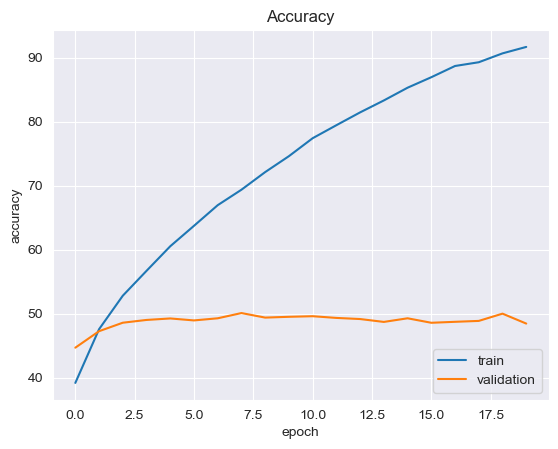

In [272]:
# Summarize history for accuracy
plt.plot(train_accuracies)
plt.plot(val_accuracies)
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
#plt.ylim((0, 1.1))
plt.show()

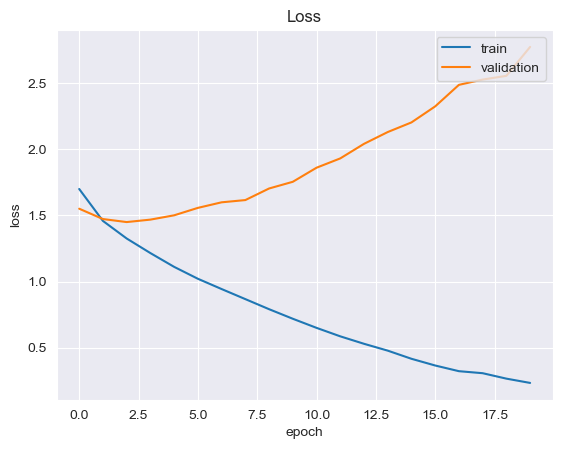

In [273]:
# Summarize history for loss
plt.plot(train_losses)
plt.plot(val_losses)
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
#plt.ylim((-0.1, 1.2))
plt.show()

## Model Evaluation - MLP


****** Test Data ********
              precision    recall  f1-score   support

           0       0.49      0.52      0.51      1000
           1       0.63      0.61      0.62      1000
           2       0.40      0.36      0.38      1000
           3       0.31      0.31      0.31      1000
           4       0.44      0.42      0.43      1000
           5       0.40      0.42      0.41      1000
           6       0.52      0.56      0.54      1000
           7       0.56      0.59      0.58      1000
           8       0.62      0.59      0.61      1000
           9       0.57      0.56      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000



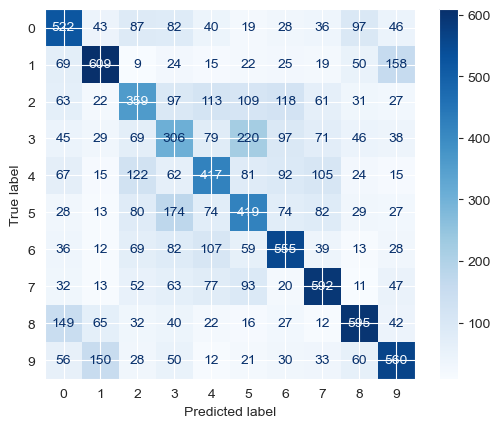

In [274]:
import sklearn
from sklearn import metrics
print("****** Test Data ********")

# Make a set of predictions for the test data
y_pred = model(X_test)
y_pred = torch.argmax(y_pred, dim=1).numpy()

# Print performance details
print(metrics.classification_report(y__test, y_pred))

# Print confusion matrix
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y__test, y_pred, cmap='Blues')
plt.show()

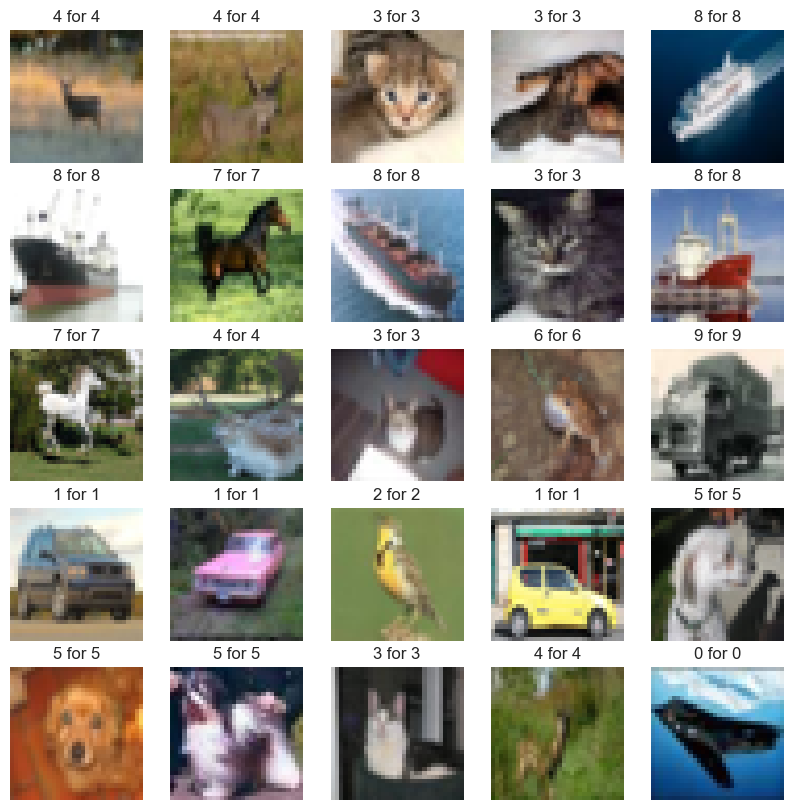

In [285]:
pltsize=2
row_images = 5
col_images = 5

maxtoshow = row_images * col_images
predictions = y_pred.reshape(-1)
corrects = predictions == y__test
ii = 0
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(X_test.shape[0]):
    if ii>=maxtoshow:
        break
    if corrects[i]:
        img = X_test[i].reshape(img_channels, img_width, img_height)
        img = np.transpose(img, (1, 2, 0))

        plt.subplot(row_images,col_images, ii+1)
        plt.axis('off')
        plt.imshow(img, vmin=0, vmax=1)
        plt.title("{} for {}".format(predictions[i], y__test[i]))
        ii = ii + 1

plt.show()

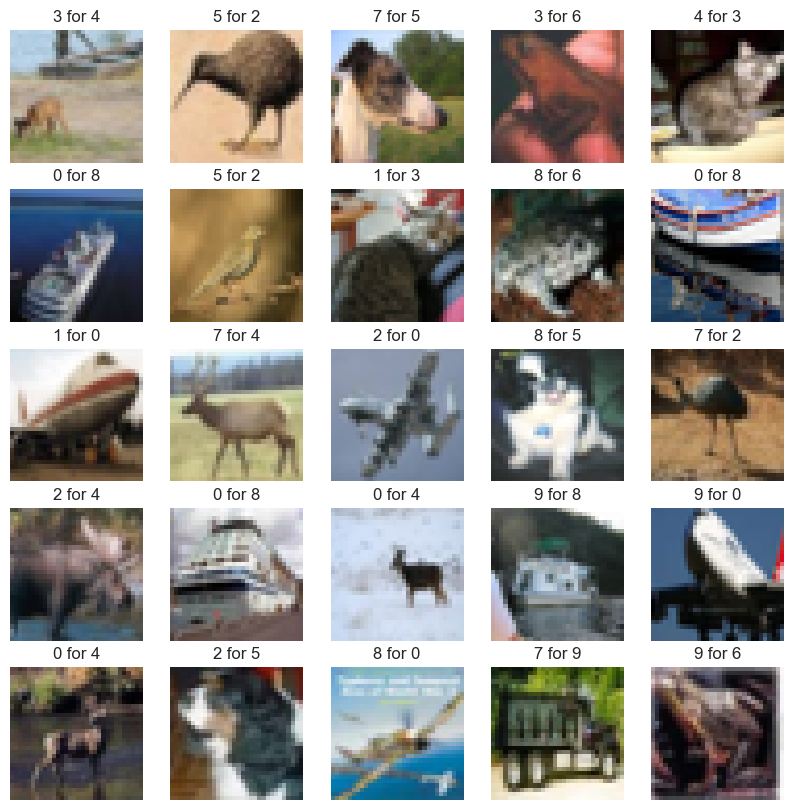

In [286]:
pltsize=2
row_images = 5
col_images = 5

maxtoshow = row_images * col_images
predictions = y_pred.reshape(-1)
corrects = predictions != y__test
ii = 0
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(X_test.shape[0]):
    if ii>=maxtoshow:
        break
    if corrects[i]:
        img = X_test[i].reshape(img_channels, img_width, img_height)
        img = np.transpose(img, (1, 2, 0))

        plt.subplot(row_images,col_images, ii+1)
        plt.axis('off')
        plt.imshow(img, vmin=0, vmax=1)
        plt.title("{} for {}".format(predictions[i], y__test[i]))
        ii = ii + 1

plt.show()